# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/thieu1995/csv-files/main/data/pandas/chipotle.tsv).

In [16]:
url = 'https://raw.githubusercontent.com/thieu1995/csv-files/main/data/pandas/chipotle.tsv'
data = pd.read_csv(url, sep='\t')

### Step 3. Assign it to a variable called chipo.

In [17]:
chipo = data

### Step 4. See the first 10 entries

In [18]:
print(chipo.head(10))

   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                              

### Step 5. Create a histogram of the top 5 items bought

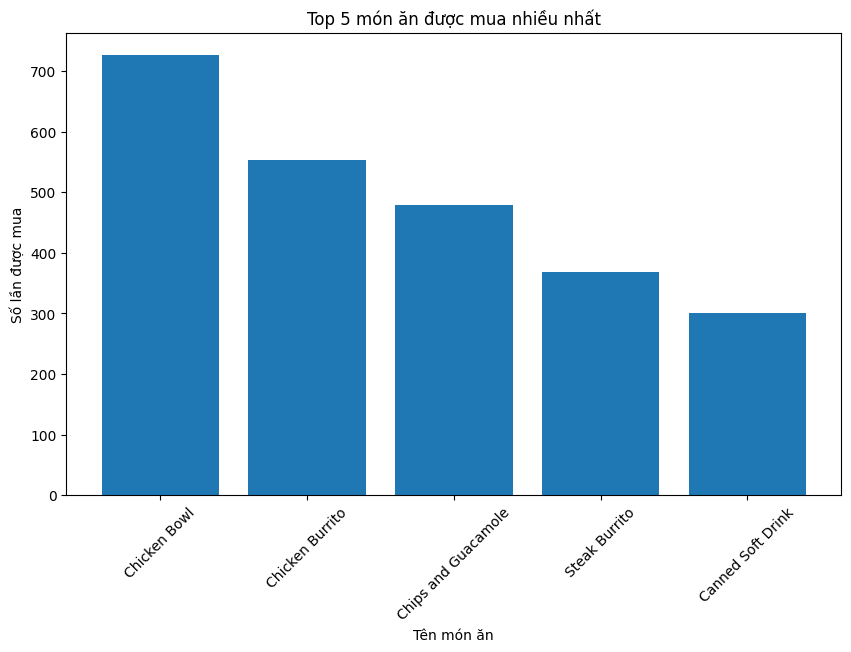

In [21]:
# Đếm số lần mỗi món ăn xuất hiện trong cột 'item_name' của DataFrame chipo
item_counts = Counter(chipo['item_name'])

# Lấy ra 5 món ăn được mua nhiều nhất
top_5_items = item_counts.most_common(5)

# Tách tên món ăn và số lần được mua thành 2 danh sách riêng biệt
items, counts = zip(*top_5_items)

# Vẽ biểu đồ cột (bar chart) thể hiện 5 món ăn được mua nhiều nhất

 # Thiết lập kích thước biểu đồ
plt.figure(figsize=(10, 6))
plt.title('Top 5 món ăn được mua nhiều nhất')  # Tiêu đề biểu đồ
plt.bar(items, counts)
plt.xlabel('Tên món ăn')  # Nhãn trục X
plt.ylabel('Số lần được mua')  # Nhãn trục Y
plt.xticks(rotation=45)
plt.show()  # Hiển thị biểu đồ

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

In [24]:
print(chipo.dtypes)  # Xem tất cả các kiểu dữ liệu trong DataFrame


order_id                int64
quantity                int64
item_name              object
choice_description     object
item_price            float64
dtype: object


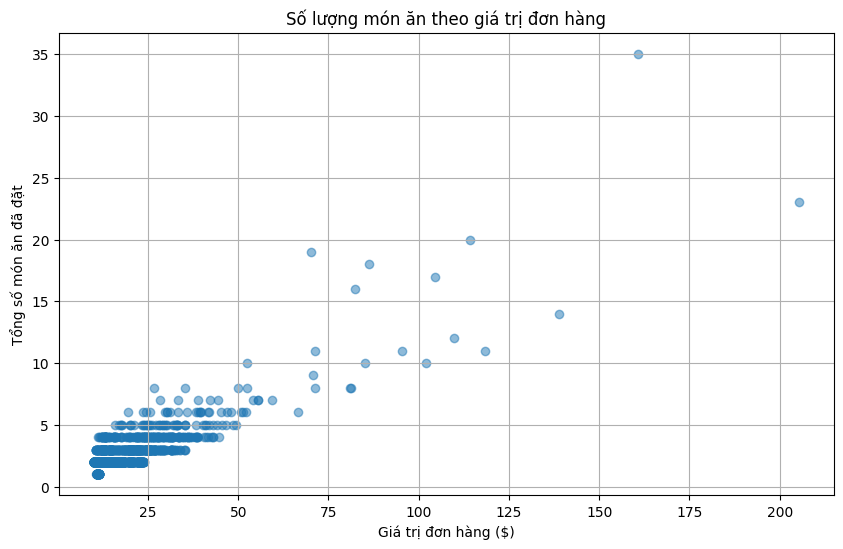

In [25]:
# Nhóm dữ liệu theo 'order_id' để tính tổng giá trị đơn hàng và tổng số lượng món ăn trong mỗi đơn
order_data = chipo.groupby('order_id').agg({
    'item_price': 'sum',   # Tổng tiền đơn hàng
    'quantity': 'sum'      # Tổng số món ăn
}).reset_index()

# Vẽ biểu đồ scatter thể hiện mối quan hệ giữa giá trị đơn hàng và số lượng món
plt.figure(figsize=(10, 6))  # Kích thước biểu đồ
plt.scatter(order_data['item_price'], order_data['quantity'], alpha=0.5)  # alpha làm điểm mờ đi để đỡ chồng
plt.title('Số lượng món ăn theo giá trị đơn hàng')
plt.xlabel('Giá trị đơn hàng ($)')
plt.ylabel('Tổng số món ăn đã đặt')
plt.grid(True)  # Hiển thị lưới
plt.show()  # Hiển thị biểu đồ


### Step 7. BONUS: Create a question and a graph to answer your own question.

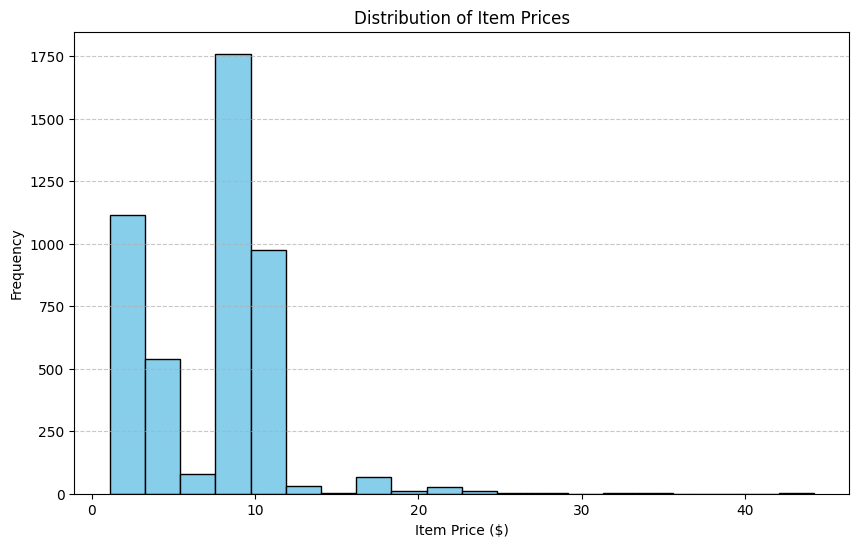

In [26]:
# Plot a histogram of item prices
plt.figure(figsize=(10, 6))
plt.hist(chipo['item_price'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Item Prices')
plt.xlabel('Item Price ($)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()